DPS1 0kGy     113
DPS2 0kGy      26
GyrA 0kGy      99
HU 0kGy        11
KhpA 0kGy      92
KhpB 0kGy       0
DPS1 10kGy     10
DPS2 10kGy    189
GyrA 10kGy    212
HU 10kGy      185
KhpA 10kGy    109
KhpB 10kGy      6
dtype: int64
DPS1 0kGy     0
DPS2 0kGy     0
GyrA 0kGy     0
HU 0kGy       0
KhpA 0kGy     0
KhpB 0kGy     0
DPS1 10kGy    0
DPS2 10kGy    0
GyrA 10kGy    0
HU 10kGy      0
KhpA 10kGy    0
KhpB 10kGy    0
dtype: int64


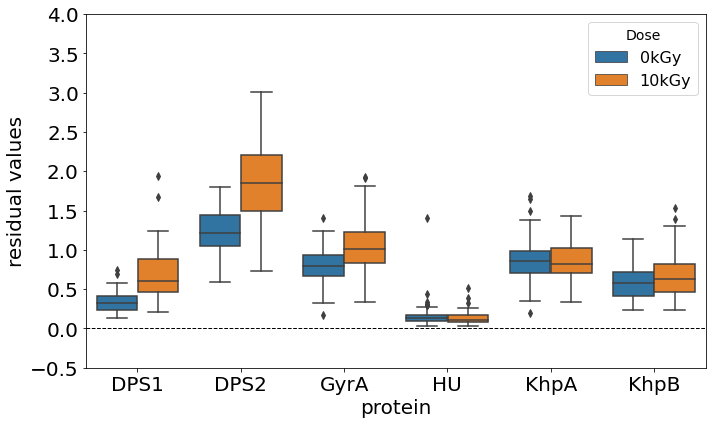

DPS1 - t-statistic: -10.4457, p-value: 1.6418e-20
DPS2 - t-statistic: -11.0194, p-value: 3.3876e-22
GyrA - t-statistic: -5.5761, p-value: 8.2628e-08
HU - t-statistic: 1.4125, p-value: 1.5944e-01
KhpA - t-statistic: 0.3747, p-value: 7.0826e-01
KhpB - t-statistic: -2.5336, p-value: 1.2090e-02


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load your Excel file into a DataFrame
file_path = r'C:\Users\sqjac\OneDrive\Desktop\research stuff\DRAD\all_residuals_2.xlsx'
df = pd.read_excel(file_path)

# Prepare the data in long format for better plotting
data = []
proteins = ['DPS1', 'DPS2', 'GyrA', 'HU', 'KhpA', 'KhpB']

# Check for missing values in the DataFrame
print(df.isna().sum())

# Drop rows with any missing values in the relevant columns
df_clean = df.dropna(subset=[f'{protein} 0kGy' for protein in proteins] + [f'{protein} 10kGy' for protein in proteins])
print(df_clean.isna().sum())

for protein in proteins:
    data.append(pd.DataFrame({
        'Protein': protein,
        'Dose': ['0kGy'] * len(df_clean) + ['10kGy'] * len(df_clean),
        'Residual Values': pd.concat([df_clean[f'{protein} 0kGy'], df_clean[f'{protein} 10kGy']])
    }))

# Concatenate all protein data into a single DataFrame
long_df = pd.concat(data)

# Create the box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Protein', y='Residual Values', hue='Dose', data=long_df)

# Add a horizontal dotted line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust the y-axis range
plt.ylim(-0.5, 4)  # Set the y-axis range to -10 to 10, adjust these values as needed


# Customize plot with larger font sizes
#plt.title('Residuals at 0kGy and 10kGy', fontsize=20)
plt.xlabel('protein', fontsize=20)
plt.ylabel('residual values', fontsize=20)
plt.legend(title='Dose', fontsize=16, title_fontsize=14)

# Optionally, you can increase the font size of the tick labels as well
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show plot
plt.tight_layout()
plt.show()

# Re-run the t-test with the cleaned data
for protein in proteins:
    data_0kGy = df_clean[f'{protein} 0kGy']
    data_10kGy = df_clean[f'{protein} 10kGy']
    
    # Perform paired t-test
    t_stat, p_value = ttest_ind(data_0kGy, data_10kGy)
    
    print(f'{protein} - t-statistic: {t_stat:.4f}, p-value: {p_value:.4e}')